In [49]:
import os
os.environ["OMP_NUM_THREADS"] = "1"


In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# LOAD THE DATASET

In [51]:
data = pd.read_csv(r"C:\Users\dhana\Downloads\customerr_data.csv")

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Customer ID     31 non-null     int64
 1   Age             31 non-null     int64
 2   Annual Income   31 non-null     int64
 3   Spending Score  31 non-null     int64
dtypes: int64(4)
memory usage: 1.1 KB


In [53]:
data.head()

,Customer ID,Age,Annual Income,Spending Score
0,1,55,56686,53
1,2,48,40811,48
2,3,32,32500,89
3,4,32,75166,97
4,5,31,74771,30


In [54]:
data.shape

(31, 4)

In [55]:
data.isnull().sum()

Customer ID       0
Age               0
Annual Income     0
Spending Score    0
dtype: int64

In [56]:
data.duplicated().sum()

0

In [57]:
data.dtypes

Customer ID       int64
Age               int64
Annual Income     int64
Spending Score    int64
dtype: object

In [58]:
data.describe()

,Customer ID,Age,Annual Income,Spending Score
count,31.000000,31.000000,31.000000,31.000000
mean,16.000000,40.677419,58310.612903,61.870968
std,9.092121,10.140306,15252.603222,18.969699
min,1.000000,23.000000,31914.000000,30.000000
25%,8.500000,32.500000,44025.000000,47.000000
50%,16.000000,40.000000,59627.000000,65.000000
75%,23.500000,49.500000,72552.000000,71.500000
max,31.000000,60.000000,79888.000000,99.000000


# DATA PREPROCESSING

In [59]:
numerical_features =["Age","Annual Income", "Spending Score"]
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])
data.head()

,Customer ID,Age,Annual Income,Spending Score
0,1,1.435788,-0.108274,-0.475369
1,2,0.734063,-1.166285,-0.743304
2,3,-0.869881,-1.720183,1.453765
3,4,-0.869881,1.123350,1.882461
4,5,-0.970127,1.097024,-1.707871


# CLUSTERING

In [60]:
OMP_NUM_THREADS =1

C:\Users\dhana\anaconda3\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dhana\anaconda3\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dhana\anaconda3\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dhana\anaconda3\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans 

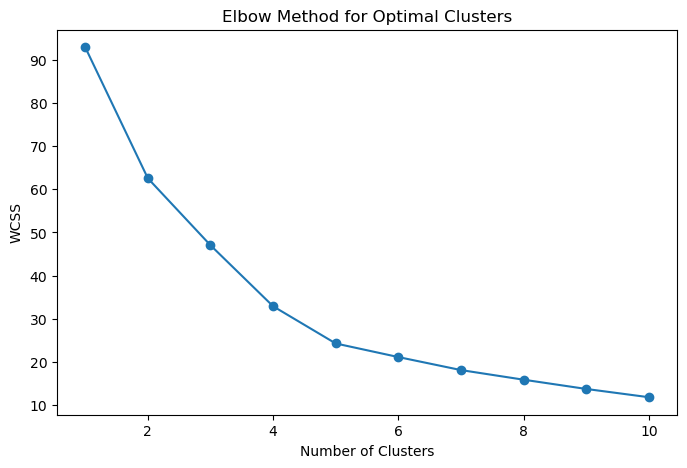

In [61]:
wcss = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data[numerical_features])
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

C:\Users\dhana\anaconda3\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Score: 0.2794119180723875


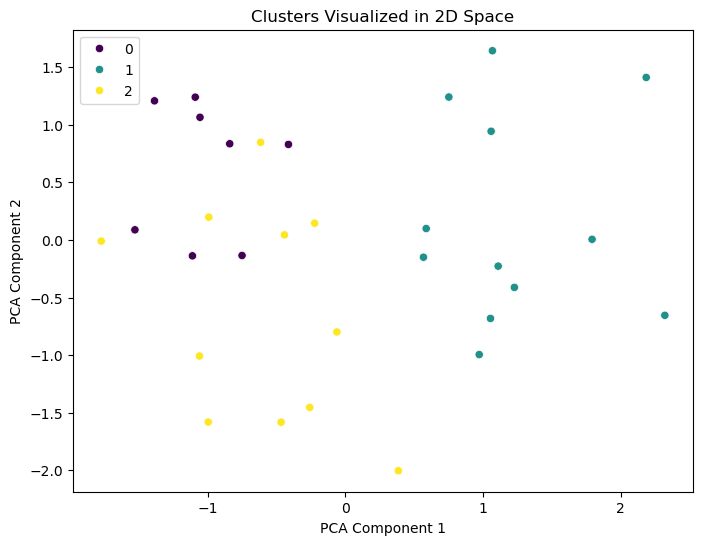

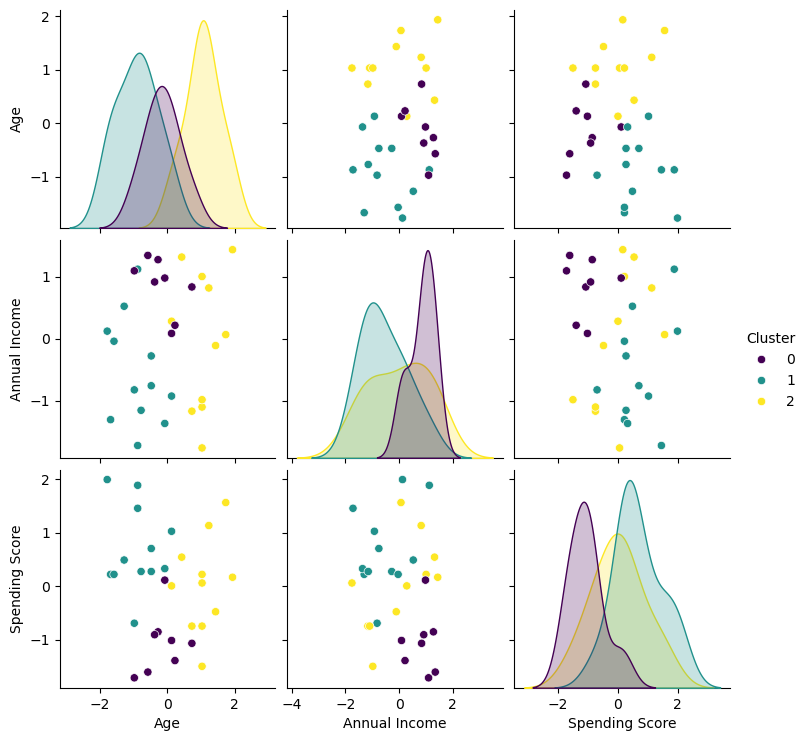

Cluster Centroids: [[-0.14309377  0.84516792 -1.05142964]
 [-0.88658854 -0.54851238  0.68121808]
 [ 1.0712557  -0.01629044  0.02152911]]


In [63]:
best_k = 3  # Assume elbow method suggests 3 clusters
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
data['Cluster'] = kmeans.fit_predict(data[numerical_features])
print("Silhouette Score:", silhouette_score(data[numerical_features], data['Cluster']))

# Step 4: Visualization
# 2D Scatter Plot using PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data[numerical_features])
data['PCA1'] = data_pca[:, 0]
data['PCA2'] = data_pca[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['PCA1'], y=data['PCA2'], hue=data['Cluster'], palette='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clusters Visualized in 2D Space')
plt.legend()
plt.show()

# Pair Plot
sns.pairplot(data, hue='Cluster', vars=numerical_features, palette='viridis')
plt.show()

# Centroid Visuals
centroids = kmeans.cluster_centers_
print("Cluster Centroids:", centroids)